# Problem Set 2, due January 26 at 11:59am (i.e., noon).

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

# Import and alias pyplot from matplotlib
import matplotlib.pyplot as plt

# Set plots to plot inline
%matplotlib inline 

# Import StatsModels for OLS
import statsmodels.api as sm

IPython version:       4.0.1 (need at least 1.0)
Numpy version:        1.10.1 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Mapltolib version:     1.5.0 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)


In [2]:
# Load dataset. 
# Create dataframe from file 
progresa_df = pd.read_csv('progresa_sample.csv')

# set progresa column to 1 for 'basal' and 0 for '0'
progresa_df.loc[:,'progresa'] = np.where(progresa_df['progresa'] == 'basal', 1, 0)

# add dummy column to hold pre-post treatement (for question 2.5)
progresa_df.loc[:,'post'] = np.where(progresa_df.year == 98, 1, 0)

# set poor column to 1 for 'pobre' and 0 for '0'
progresa_df.loc[:,'poor'] = np.where(progresa_df['poor'] == 'pobre', 1, 0)


In [3]:
# Define columns to be excluded in demographics database
cols = [col for col in progresa_df.columns if col not in ['year', 'folnum', 'village']]

# Create df to hold demographic columns
progresa_demo = progresa_df[cols]

# Sort and transpose
progresa_demo_sorted = progresa_demo.sort_index(axis=1).describe().transpose()

# Show df
progresa_demo_sorted

,count,mean,std,min,25%,50%,75%,max
age,77250,11.366460,3.167744,6.000000,9.000000,11.000000,14.000000,17.000000
dist_cap,77250,147.674452,76.063134,9.465392,92.327050,132.001494,184.445225,359.774457
dist_sec,77250,2.418910,2.234109,0.000000,0.574000,2.279000,3.582000,14.879000
fam_n,77250,7.215715,2.352900,1.000000,6.000000,7.000000,9.000000,24.000000
grc,70701,3.963537,2.499063,0.000000,2.000000,4.000000,6.000000,14.000000
grc97,77250,3.705372,2.572387,0.000000,1.000000,4.000000,6.000000,14.000000
hohage,77240,44.436717,11.620372,15.000000,36.000000,43.000000,51.000000,98.000000
hohedu,77250,2.768104,2.656106,0.000000,0.000000,2.000000,4.000000,20.000000
hohsex,77230,0.925185,0.263095,0.000000,1.000000,1.000000,1.000000,1.000000
hohwag,77250,586.985312,788.133664,0.000000,120.000000,500.000000,750.000000,14000.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
# Filter df to just 'poor' and '1997' records
progresa_bl_poor = progresa_df[(progresa_df['year'] == 97) & (progresa_df['poor'] == 1)]

#split into two dfs based on 'progresa' column and describe
treated_desc = progresa_bl_poor[progresa_bl_poor['progresa'] == 1].describe()
control_desc = progresa_bl_poor[progresa_bl_poor['progresa'] == 0].describe()

#create list variable for use in for loop
plist = []

#walk through columns and calculate p-values
for col in treated_desc:
    #skip columns we don't care about
    #if col in ('year', 'poor', 'progresa', 'folnum', 'village'):
    #    continue
    #shorthand the columns to pass into ttest function
    treated = treated_desc[col]
    control = control_desc[col]
    #ttest function
    t, p = sp.stats.ttest_ind_from_stats(treated['mean'], treated['std'], treated['count'],
                                        control['mean'], control['std'], control['count'])
    #treated_desc[col]['p'] = p
    #print col, treated['mean'], control['mean'], treated['mean'] - control['mean'], p
    plist.append(p)

treated_desc.loc[len(treated_desc)] = plist
treated_desc = treated_desc.transpose()
control_desc = control_desc.transpose()
treated_desc['diff'] = treated_desc['mean'] - control_desc['mean']


#progresa_bl_compare = pd.concat([treated_desc['mean'], control_desc['mean']], treated_desc['diff']\
#                                , treated_desc[8], axis=1, keys=['treated_desc', 'control_desc'])
progresa_bl_compare = pd.concat([treated_desc['mean'], control_desc['mean'], treated_desc['diff'], treated_desc[8]], axis = 1)

progresa_bl_compare.columns = ['Average value (Treatment villages)', 'Average value (Control villages)'\
                               , 'Difference (Treat - Control)', 'p-value']
progresa_bl_compare.index.name = 'Variable'
progresa_bl_compare

,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
Variable,,,,
year,97.000000,97.000000,0.000000,NaN
sex,0.519317,0.505052,0.014265,1.219172e-02
indig,0.325986,0.332207,-0.006222,2.453603e-01
dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
sc,0.822697,0.815186,0.007511,9.517806e-02
grc,3.531599,3.543050,-0.011450,6.890151e-01
fam_n,7.281327,7.302469,-0.021142,4.271039e-01
min_dist,107.152915,103.237854,3.915060,2.358312e-16
dist_cap,150.829074,153.769730,-2.940656,8.415005e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

There appear to be several attributes of participants in treatment and control villages that showed statistically significant differences at baseline. Notably, a participant's distance from the capitol, distance from an urban center, head of household wages, head of household education, head of household age, and welfare index tended to be different in control vs. treatement villages. This is important, because a truly random assignment of treatment and control would be expected to produce two like populations. Differences at baseline in treatment and control groups make it difficult to identify causal relataionships between treatment and outcomes with simple analysis. Simple difference analysis is not sufficient. A Difference-in-Difference analysis is needed to account for dissimilarity in the baseline populations.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

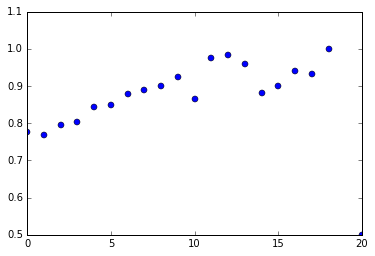

In [5]:
# set y variable as mean enrollment rate: filter for 1997, then group by hohedu
y = progresa_df[progresa_df['year'] == 97].groupby('hohedu').mean()['sc']
# set x variable to index, which should equal the number of years
x = y.index

# plot results
plt.figure()
plt.plot(x,y,'bo')

There appears to be a nearly linear, positive relationship between head of household education and the enrollment rate of a child in that house. i.e., the more years of schooling that the head of the household reported completing, the greater the likelihood that his/her child is enrolled in school.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

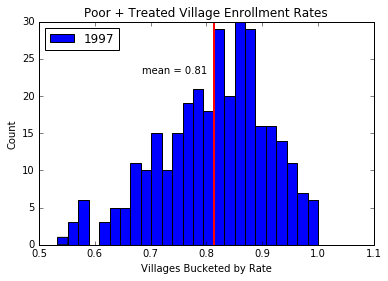

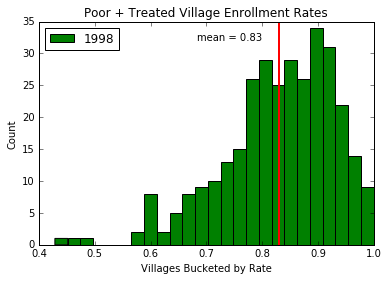

In [6]:
# create df of poor, treated households in 1997, grouped by village, showing mean of enrollment
villages7 = progresa_df[(progresa_df['year'] == 97) & (progresa_df['poor'] == 1)\
                        & (progresa_df['progresa'] == 1)].groupby('village').sc.mean()

# create df of poor, treated households in 1998, grouped by village, showing mean of enrollment
villages8 = progresa_df[(progresa_df['year'] == 98) & (progresa_df['poor'] == 1)\
                        & (progresa_df['progresa'] == 1)].groupby('village').sc.mean()

# plot first histogram - 1997 df
plt.figure(1)
plt.hist(villages7.values, 25, label='1997')
# Add labels for clarity
plt.xlabel('Villages Bucketed by Rate')
plt.ylabel('Count')
plt.title(r'Poor + Treated Village Enrollment Rates')
plt.legend(loc='upper left')
# add vertical line for mean value
plt.axvline(x=villages7.values.mean(), linewidth=2, color='red')
# create mean label variable
mean_text = 'mean = '+ str(round(villages7.values.mean(), 2))
# label mean
plt.annotate(mean_text, xy = (villages7.values.mean(), 25), xytext = (villages7.values.mean()-.13, 23))

# plot second histogram - 1998 df
plt.figure(2)
plt.hist(villages8.values, 25, color='green', label='1998')

# Add labels for clarity
plt.xlabel('Villages Bucketed by Rate')
plt.ylabel('Count')
plt.title(r'Poor + Treated Village Enrollment Rates')
plt.legend(loc='upper left')
# add vertical line for mean value
plt.axvline(x=villages8.values.mean(), linewidth=2, color='red')
# create mean label variable
mean_text = 'mean = '+ str(round(villages8.values.mean(), 2))
# label mean
plt.annotate(mean_text, xy = (villages8.values.mean(), 25), xytext = (villages7.values.mean()-.13, 32))



In [7]:
# calculate mean/std/count for each set, for use in ttest_ind_from_stats function below
v7_desc = villages7.describe()
v8_desc = villages8.describe()

# ttest function
poor_enroll_ttest = sp.stats.ttest_ind_from_stats(v7_desc['mean'], v7_desc['std'], v7_desc['count'],
                                    v8_desc['mean'], v8_desc['std'], v8_desc['count'])

# print results
print 'T-test for enrollment changes in poor villages, pre/post- treatment:', poor_enroll_ttest

T-test for enrollment changes in poor villages, pre/post- treatment: Ttest_indResult(statistic=-2.0157134865155664, pvalue=0.044248700365728644)


Exploring the enrollment rates betweent pre- and post-treatment villages among poor households reveals a visible difference between the distribution means (.81 vs .83), and a statistically significant T-statistic within 95% confidence (p-value = .04). We can therefore conclude that the enrollment rate did change for poor households in treatment villages between 97 and 98.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [8]:
# create 2 df's for comparison: 1998 poor treated, 1998 poor untreated
progresa8_treat = progresa_df[(progresa_df['year'] == 98) & (progresa_df['poor'] == 1)\
                             & (progresa_df['progresa'] == 1)]

progresa8_control = progresa_df[(progresa_df['year'] == 98) & (progresa_df['poor'] == 1)\
                             & (progresa_df['progresa'] == 0)]

# calculate mean, std, count for each df for use in ttest below
p8_treat_sc_desc = progresa8_treat['sc'].describe()
p8_control_sc_desc = progresa8_control['sc'].describe()

# calculate simple difference in means
treat_diff = p8_treat_sc_desc['mean'] - p8_control_sc_desc['mean']
print 'Difference in means:', treat_diff

#ttest function for simple difference
simple_diff_ttest = sp.stats.ttest_ind_from_stats(p8_treat_sc_desc['mean'], p8_treat_sc_desc['std'], p8_treat_sc_desc['count'],
                                    p8_control_sc_desc['mean'], p8_control_sc_desc['std'], p8_control_sc_desc['count'])

# print results
print 'T-test for enrollment outcome in poor villages, treatment vs. control:', simple_diff_ttest

Difference in means: 0.0388421646651
T-test for enrollment outcome in poor villages, treatment vs. control: Ttest_indResult(statistic=8.3587205674184784, pvalue=6.636344447517305e-17)


A simple difference analysis between treatment and control outcomes shows a difference of .0388% in enrollment. This is statistically significant (p-value = < .0001). Based on this information alone, it would appear that the treatement had an effect. However, as we saw before that there were significant differences between treatment and control groups pre-treatment, a simple differences analysis is not adequate.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [9]:
# create df filtered for poor households in 1998
poor8 = progresa_df[(progresa_df['year'] == 98) & (progresa_df['poor'] == 1)]

# ols function regressing enrollment on treatment
simp_diff_reg = sm.formula.ols(formula='sc ~ progresa', data=poor8).fit()

print simp_diff_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 25 Jan 2016   Prob (F-statistic):           6.64e-17
Time:                        16:39:03   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

The result is the same as with the simple differences using the means T-test above (.0388). This means that the average percent of enrollment among treatment villages in 1998 was .0388% higher than in control villages in 1998. However, we cannot reject the null hypothesis that the treatement had no effect, because a simple differences comparison is not sufficient. We already showed that the treatment and control populations were significantly different at baseline, so we cannot attribute the difference in post-treatment enrollment to the treatment alone. The counterfactual assumption in this analysis is that absent treatment (i.e., Progresa) the average enrollment among treated villages would have been the same as control villages in 1998. We cannot safely make this assumption because we have not controlled for differences at baseline.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [10]:
# regress enrollment on treatment plus control variables
simp_diff_mult_reg = sm.formula.ols(formula='sc ~ progresa + C(age) + dist_sec + hohedu + sex + welfare_index + indig + min_dist', data=poor8).fit()

print simp_diff_mult_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     795.4
Date:                Mon, 25 Jan 2016   Prob (F-statistic):               0.00
Time:                        16:39:05   Log-Likelihood:                -6382.2
No. Observations:               27267   AIC:                         1.280e+04
Df Residuals:                   27249   BIC:                         1.295e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.8542      0.014     63.081

Including a number of control variables decreases the estimated effect of treatment slightly (from .0388 to .0326) with a higher t-statistic (8.359 to 8.506). The p-value is < .000 for both. Multiple regression also shows that the other variables have greater impacts on enrollment. For example, age showed significant negative impact on enrollment, with 17 year-olds being 69% less likely to enroll than other children, and 16 year-olds being 62% less likely. Male children were 3.2% more likely to be enrolled.

The simple and multiple regressions do not show much difference in the estimated effect of the treatment. This would seem to indicate that enrollment in 1998 was ~ 3%-4% higher for households participating in Progresa, but does not imply a causal effect.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [11]:
# poor households from 98 have already been split into treatment/control df's above. Repeat for 97.

progresa7_treat = progresa_df[(progresa_df['year'] == 97) & (progresa_df['poor'] == 1)\
                             & (progresa_df['progresa'] == 1)]

progresa7_control = progresa_df[(progresa_df['year'] == 97) & (progresa_df['poor'] == 1)\
                             & (progresa_df['progresa'] == 0)]

# calculate mean/std/count for baseline dfs (97)
p7_treat_sc_desc = progresa7_treat['sc'].describe()
p7_control_sc_desc = progresa7_control['sc'].describe()

# compute difference for treated outcome vs treated baseline
treat_diff = p8_treat_sc_desc['mean'] - p7_treat_sc_desc['mean']

print 'Difference in means:', treat_diff

#ttest function
treat_ttest = sp.stats.ttest_ind_from_stats(p7_treat_sc_desc['mean'], p7_treat_sc_desc['std'], p7_treat_sc_desc['count'],
                                    p8_treat_sc_desc['mean'], p8_treat_sc_desc['std'], p8_treat_sc_desc['count'])

# print results
print 'T-test for enrollment baseline in poor villages, treatment vs. control:', treat_ttest


Difference in means: 0.023782233992
T-test for enrollment baseline in poor villages, treatment vs. control: Ttest_indResult(statistic=-6.0692739292913984, pvalue=1.2976490728127511e-09)


In [12]:
# compute difference in control outcome vs baseline

control_diff = p8_control_sc_desc['mean'] - p7_control_sc_desc['mean']

print 'Difference in means:', control_diff

#ttest function
control_ttest = sp.stats.ttest_ind_from_stats(p7_control_sc_desc['mean'], p7_control_sc_desc['std'], p7_control_sc_desc['count'],
                                    p8_control_sc_desc['mean'], p8_control_sc_desc['std'], p8_control_sc_desc['count'])

# print results
print 'T-test for enrollment changes in poor villages, control group:', control_ttest

Difference in means: -0.00754904632728
T-test for enrollment changes in poor villages, control group: Ttest_indResult(statistic=1.4355850984946401, pvalue=0.15113452970157179)


In [13]:
#calculate diff-in-diff
diff_in_diff = treat_diff - control_diff

print 'Difference in Difference:', diff_in_diff



Difference in Difference: 0.0313312803193


The difference-in-difference analysis of progresa treatment on school enrollment rates returns an effect of .0313. This means that the treated group saw an increase in enrollment of 3.13%, when accounting for changes in enrollment rates to the control group over the same period. This assumes that in the absense of treatment, the treated group would have experienced an enrollment rate change identical to the control group's. (though it is worth noting that the control group's mean change in enrollment was not statistically significant, with a p-value > .15)

Based on this analysis, it would appear that Progresa had a measurable positive effect on enrollment.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [16]:
# create df of just poor households
poor = progresa_df[progresa_df['poor'] == 1]

# run regressoin of enrollment (sc) on treatment (progresa) interacted with a dummy variable to denote pre- or post-treatment
# control for several variables. 
# make 'age' categorical, as it is not continuous and ranges only from 7-17
did_reg = sm.formula.ols(formula='sc ~ progresa*post + C(age) + dist_sec + hohedu + sex + dist_cap + indig', data=poor).fit()

print did_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1619.
Date:                Mon, 25 Jan 2016   Prob (F-statistic):               0.00
Time:                        16:40:01   Log-Likelihood:                -13871.
No. Observations:               58165   AIC:                         2.778e+04
Df Residuals:                   58145   BIC:                         2.796e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.9138      0.007    127.820

This difference-in-difference multiple regression shows a treatment effect of .0304. This means that the treatment group showed a 3.04% increase in enrollment when compared to the control group over the same period, while controlling for factors like age, distance from school, head of household education, sex, distance from the capitol, and indigeneity. The p-value of .02 means that we can reject the null hypothesis that there is no difference between treatment and control, and conclude that members of the treatment group did have a statistically significant difference in their outcome.

The estimate of 3.04% is slightly smaller than what we calculated in the tabular difference-in-difference analysis (3.13%), which was smaller than the simple difference multiple regression (3.26%), which was smaller than the simple difference linear regression (3.88%). In other words, as we accounted for more variables (whether through adding variables to the regression, or factoring in changes to the control group), the estimated effect of the treatment decreased.

The counterfactual assumption in this regression is that absent treatment, the treatment group would have had the same enrollment rate as the control group, when controlling for age, distance from school, head of household education, sex, distance from the capitol, and indigeneity.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [17]:
# create df to hold outcomes (1998)
progresa8 = progresa_df[progresa_df['year'] == 98]

# regress enrollment onto treatment interacted with poor, controlling for the other variables
did_reg2 = sm.formula.ols(formula='sc ~ progresa*poor + C(age) + dist_sec + hohedu + sex + dist_cap + indig', data=progresa8).fit()

print did_reg2.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     882.8
Date:                Mon, 25 Jan 2016   Prob (F-statistic):               0.00
Time:                        17:14:15   Log-Likelihood:                -7882.1
No. Observations:               31975   AIC:                         1.580e+04
Df Residuals:                   31956   BIC:                         1.596e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.9145      0.010     90.684

In this regression, the counterfactual assumption is that absent treatment, the difference in enrollment between treatment and control groups in poor and non-poor villages would have been the same, when controlling for age, distance from school, head of household education, sex, distance from the capitol, and indigeneity. The results of the regression are not significant enough (p-value = .131) to reject the null hypothesis that poor treatment households have meaningfully different enrollment rates in 1998. Another way of saying this is that the treatment on poor households does not have a correlation with different enrollment rates. Yet treatment on non-poor households does correlate with an enrollment increase of 2.1% (p-value = .022).

One possible explanation for this difference between treated poor and non-poor enrollment rates is that non-poor families could better afford to forego the income generated by a working child (of which Progresa covered ~ 75%), and so would be more inclined to enroll their child. Poor families may not have viewed the Progresa funds as sufficient to forego the additional income. 

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?

In [19]:
# create df of just poor households
non_poor = progresa_df[progresa_df['poor'] == 0]

# regress enrollment onto treatment and pre/post dummy variable, plus controls
did_reg_non_poor = sm.formula.ols(formula='sc ~ progresa*post + C(age) + dist_sec + hohedu + sex + dist_cap + indig', data=non_poor).fit()

print did_reg_non_poor.summary()


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 25 Jan 2016   Prob (F-statistic):               0.00
Time:                        17:48:20   Log-Likelihood:                -3107.7
No. Observations:               10378   AIC:                             6255.
Df Residuals:                   10358   BIC:                             6400.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.8831      0.020     44.741

As alluded to in 2.6, Progresa may have impacted non-poor households that were incented to enroll their children in school in order to qualify for the subsidy. Yet in this diff-in-diff regression, we do not see the effect. Treated non-poor households do not have a statistically different enrollment rate than non-treated non-poor households (p-value = .88). 

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

It appears that there is evidence that Progresa had a causal impact on enrollment rates in poor households. The regression from 2.5 supports this, while controlling for a variety of important variables. Differences at baseline are accounted for using difference-in-difference, and subsequent analysis on non-poor enrollment and progresa impact does not alter the estimated 3.04% increase in enrollment among treated households. 

Perhaps a harder question is whether the program was worthwhile. Not knowing the target increase of enrollment that the program managers were seeking, I don't know whether it succeeded. I imagine an economic analysis on the long-term effects of increased enrollment and future earnings against the total expense of the program would best support that argument one way or another.